In [86]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score



# Load data

In [3]:
hospital_data = pd.read_csv('hospital_mortality.csv')

In [87]:
hospital_data.head(5)

,PATIENT_ID,Age,Gender,Height,ICUType,BUN_Min,Creatinine_Min,GCS_Min,Glucose_Min,HCO3_Min,...,Na_Range,PaCO2_Range,PaO2_Range,Platelets_Range,Temp_Range,Urine_Range,WBC_Range,Weight_Range,pH_Range,In-hospital_death
0,132539.0,54.0,0.0,-1.0,4.0,8.0,0.7,14.0,115.0,26.0,...,1.0,12.0,136.0,36.0,3.1,900.0,1.8,0.0,0.11,0
1,132540.0,76.0,1.0,175.3,2.0,16.0,0.8,3.0,105.0,21.0,...,4.0,13.0,363.0,91.0,3.4,770.0,5.9,5.6,0.11,0
2,132541.0,44.0,0.0,-1.0,3.0,3.0,0.3,5.0,119.0,24.0,...,3.0,4.0,167.0,41.0,2.3,407.0,2.5,0.0,0.04,0
3,132543.0,68.0,1.0,180.3,3.0,10.0,0.7,14.0,106.0,27.0,...,4.0,12.0,136.0,107.0,1.9,600.0,3.6,0.0,0.11,0
4,132545.0,88.0,0.0,-1.0,3.0,25.0,1.0,15.0,92.0,18.0,...,1.0,12.0,136.0,12.0,2.0,204.0,1.0,0.0,0.11,0


### How many patients have 20 or more missing feature values? 

In [4]:
def find_missingVal_row_num(df,num_missing_val):
    sum=0
    lst_missingVal_num=df.isnull().sum(axis=1)
    for i in lst_missingVal_num:
        if i >=20:
            sum+=1
    return sum

patinet_num_result=find_missingVal_row_num(hospital_data, 20)
print("the number of patients have 20 or more missing feature values is ", patinet_num_result)

the number of patients have 20 or more missing feature values is  210


### What’s the difference in means of HR_min for patients that died vs survived (not counting patients with HR_min of  0)?

In [5]:
def mean_diff(df, column_to_compare, column_to_groupBy):
    sum_for_cat1=0
    num_for_cat1=0
    sum_for_cat0=0
    num_for_cat0=0
    for index, row in df.iterrows():
        value= row[column_to_compare]
        cat = row[column_to_groupBy]
        if value != value:
            continue
        else:
            if cat ==1:
                sum_for_cat1 += value
                num_for_cat1 +=1
            if cat ==0:
                sum_for_cat0 += value
                num_for_cat0 +=1
            else:
                continue
    cat1_avg = float(sum_for_cat1/num_for_cat1)
    cat0_avg = float(sum_for_cat0/num_for_cat0)
    
    return cat1_avg-cat0_avg

compare_result=mean_diff(hospital_data, "HR_Min", "In-hospital_death")

print ("The mean value of HR_Min(smallest heart rate in bpm) of patient in category 1(died in-hospital) is {} larger than that of patinet in category 0(survivor)".format(compare_result))



The mean value of HR_Min(smallest heart rate in bpm) of patient in category 1(died in-hospital) is 1.009285477728099 larger than that of patinet in category 0(survivor)


### What is the median maximum heart rate for patients whose maximum temperature was 2 degrees Celsius higher than their minimum temperature?

In [6]:
## Your code here
def find_median_HRMax(df):
    HRMax_list=[]
    for index, row in df.iterrows():
        if row["Temp_Range"]>2:
            HRMax_list.append(row["HR_Max"])
            
    return statistics.median(HRMax_list)

median_result = find_median_HRMax(hospital_data)

print("the median maximum heart rate for patients whose maximum temperature was 2 degrees Celsius higher than their minimum temperature is ", median_result )

    
    
    

the median maximum heart rate for patients whose maximum temperature was 2 degrees Celsius higher than their minimum temperature is  113.0


### Create a plot to analyze the relationship between median temperature, outcome (died vs. survived), and age.

In [8]:
hospital_data=hospital_data.apply(lambda x: x.fillna(x.median()),axis=0)
print( np.corrcoef((hospital_data['Age'], hospital_data['Temp_Median'])))

[[ 1.         -0.20275796]
 [-0.20275796  1.        ]]


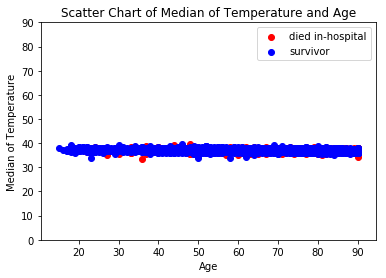

In [30]:
## Your code here

cat1=hospital_data[hospital_data['In-hospital_death'] == 1]

cat0=hospital_data[hospital_data['In-hospital_death'] == 0]

axes = plt.gca()
axes.set_ylim([0,90])

plt.scatter(cat1['Age'],cat1['Temp_Median'], color=['red'])
plt.scatter(cat0['Age'],cat0['Temp_Median'], color=['blue'])

plt.legend(['died in-hospital', 'survivor' ], loc='upper right')
plt.xlabel('Age')
plt.ylabel('Median of Temperature')
plt.title('Scatter Chart of Median of Temperature and Age')

plt.show()


### Create a plot to analyze the relationship between median temperature, outcome (died vs. survived), and gender.

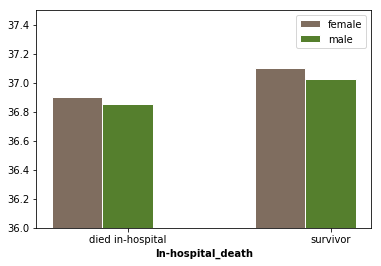

[36.9, 37.1] [36.85, 37.025]


In [37]:
## Your code here
cat1_male=cat1[cat1['Gender']==1]["Temp_Median"].median()
cat1_female=cat1[cat1['Gender']==0]["Temp_Median"].median()
cat0_male=cat0[cat0['Gender']==1]["Temp_Median"].median()
cat0_female=cat0[cat0['Gender']==0]["Temp_Median"].median()

male = [cat1_male, cat0_male]
female=[cat1_female, cat0_female]

axes = plt.gca()
axes.set_ylim([36,37.5])

barWidth = 0.25

r1 = np.arange(len(male))
r2 = [x + barWidth for x in r1]


plt.bar(r1, male, color='#7f6d5f', width=barWidth, edgecolor='white', label='female')
plt.bar(r2, female, color='#557f2d', width=barWidth, edgecolor='white', label='male')

plt.xlabel('In-hospital_death', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(male))], ['died in-hospital', 'survivor'])

plt.legend()
plt.show()

print(male, female)

### Build and summarize the results of a machine learning model that predicts whether a patient dies or survives in the hospital. (We do not expect a perfect or highest-accuracy solution; this is primarily an opportunity for you to show your machine learning project workflow and to document your thought process, approach to solving problems, and interpretation of results.)

In [75]:
## Your code here
X = hospital_data.loc[:, 'Age':'pH_Range']
y = hospital_data['In-hospital_death']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [79]:
model = RandomForestRegressor(n_estimators=100,n_jobs=-1,verbose=3, min_samples_leaf=5,oob_score=False,max_features="auto",max_depth=30,min_samples_split=2,max_leaf_nodes=-1)
model.fit(X_train,y_train)

test_predict_result=model.predict(X_test)

score = accuracy_score(y_test, test_predict_result.round())

print(score)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
